In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid


In [2]:
x = np.array([[200, 17]])

In [4]:
layer_1 = Dense(units=3, activation='sigmoid')

In [5]:
a1 = layer_1(x)

2022-07-13 14:52:32.304228: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
a1

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.0000000e+00, 0.0000000e+00, 1.8506633e-21]], dtype=float32)>

In [9]:
layer_2 = Dense(units=1, activation='sigmoid')
a2 = layer_2(a1)

a2

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.5]], dtype=float32)>

In [15]:
a1.numpy(), float(a2.numpy())

(array([[0.0000000e+00, 0.0000000e+00, 1.8506633e-21]], dtype=float32), 0.5)

In [27]:
model = Sequential([layer_1, layer_2])
model

In [32]:
def standardize_mat(X):
    return X / X.max(axis=0)

In [33]:
# Function to create dense layer with activation function. The activation function is sigmoid by default.
def my_dense_layer(A_in: np.matrix, W: np.matrix, b: np.ndarray, g: str = 'sigmoid') -> np.matrix:
    """
    Function to create dense layer with activation function. The activation function is sigmoid by default.
    :param A_in: Input matrix with format (n rows, 1 column)
    :param W: Weight matrix (n rows, m columns)
    :param b: Bias vector (1 row, m columns)
    :param g: Activation function
    :return: Output matrix
    """
    A_in = standardize_mat(A_in)
    A_out = np.matmul(A_in, W) + b
    if g == 'sigmoid':
        A_out = 1 / (1 + np.exp(-A_out))
    elif g == 'relu':
        A_out = np.maximum(0, A_out)
    return A_out

In [35]:
A_in = np.array([[200, 17]])
W = np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]])
b = np.array([[0.1], [0.2], [1]])

my_dense_layer(A_in, W, b)

array([[0.64565631, 0.68997448, 0.73105858],
       [0.66818777, 0.7109495 , 0.75026011],
       [0.81757448, 0.84553473, 0.86989153]])

In [20]:
def my_sequential(x, W1, b1, W2, b2, W3, b3):
    A1 = my_dense_layer(x, W1, b1)
    A2 = my_dense_layer(A1, W2, b2)
    A3 = my_dense_layer(A2, W3, b3)
    return A3

In [73]:
# (size in 1000 square feet)
X_train = np.array([[1.0], [2.0]], dtype=np.float32)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)



In [74]:
linear_layer = tf.keras.layers.Dense(units=1, activation='linear', )


In [75]:
a1 = linear_layer(X_train[0].reshape(1,1))
a1

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-1.3522756]], dtype=float32)>

In [76]:
w, b = linear_layer.get_weights()
w, b

(array([[-1.3522756]], dtype=float32), array([0.], dtype=float32))

In [77]:
set_w = np.array([[200.0]])
set_b = np.array([100.0])

In [78]:
linear_layer.set_weights([set_w, set_b])

In [79]:
linear_layer.get_weights()

[array([[200.]], dtype=float32), array([100.], dtype=float32)]

In [83]:
np.dot(X_train, set_w) + set_b, linear_layer(X_train).numpy()

(array([[300.],
        [500.]]),
 array([[300.],
        [500.]], dtype=float32))

In [84]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

In [86]:
pos = Y_train == 1
neg = Y_train == 0

X_train[pos]

array([3., 4., 5.], dtype=float32)

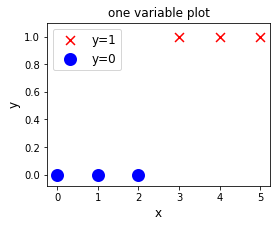

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c='red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", c = 'blue', facecolors='none', lw=3)

ax.set_ylim(-0.08, 1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()


In [90]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation='sigmoid', name='L1')
    ]
)


In [93]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
